In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_data, val_data, test_data = tfds.load("fashion_mnist", 
                                            #split=['train[10000:]', 'train[0:10000]', 'test'], 
                                            split=['train[20%:]', 'train[0%:20%]', 'test'],
                                            as_supervised=True)

def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x) / 255.0, np.asarray(y)

train_images, train_labels = helper(train_data)
val_images, val_labels = helper(val_data)
test_images, test_labels = helper(test_data)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-05 18:43:17.419496: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-05 18:43:17.419615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-05 18:43:17.496193: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt1 = tf.keras.optimizers.SGD(learning_rate=0.01)
opt2 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.975, decay=2e-06, nesterov=True)

model.compile(optimizer=opt1,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs=10)

Epoch 1/10
  24/1500 [..............................] - ETA: 6s - loss: 2.2748 - accuracy: 0.1992

2023-01-05 18:43:21.855198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1491/1500 [============================>.] - ETA: 0s - loss: 0.8943 - accuracy: 0.7114

2023-01-05 18:43:28.556978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.8921 - accuracy: 0.7122 - val_loss: 0.6107 - val_accuracy: 0.7908
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5654 - accuracy: 0.8062 - val_loss: 0.5320 - val_accuracy: 0.8141
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5083 - accuracy: 0.8242 - val_loss: 0.4932 - val_accuracy: 0.8277
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4785 - accuracy: 0.8342 - val_loss: 0.4658 - val_accuracy: 0.8392
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4589 - accuracy: 0.8414 - val_loss: 0.4542 - val_accuracy: 0.8448
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4445 - accuracy: 0.8462 - val_loss: 0.4422 - val_accuracy: 0.8497
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4331 - accuracy: 0.8495 - val_loss: 0.4284 - val_accuracy: 0.8526
Epo

Text(0.5, 0, 'epochs')

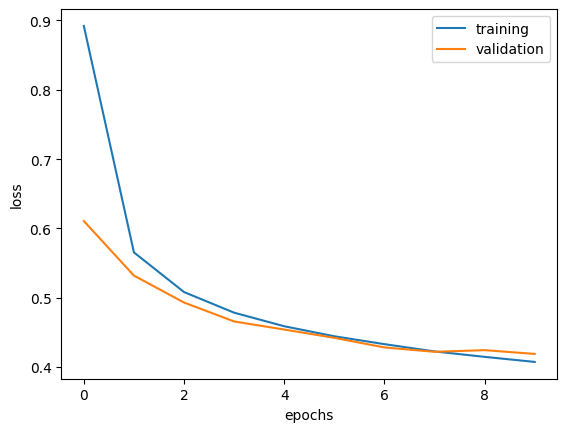

In [9]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [10]:
model.evaluate(test_images, test_labels)

 21/313 [=>............................] - ETA: 1s - loss: 0.4376 - accuracy: 0.8497

2023-01-05 18:44:38.948236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.4466 - accuracy: 0.8428


[0.4465519189834595, 0.8428000211715698]

In [11]:
y_pred = model.predict(test_images)
y_pred = np.asarray([np.argmax(y) for y in y_pred])

 85/313 [=======>......................] - ETA: 0s

2023-01-05 18:44:40.606360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
conf_mat = confusion_matrix(y_true=test_labels, y_pred=y_pred)#, normalize='all')

<AxesSubplot: >

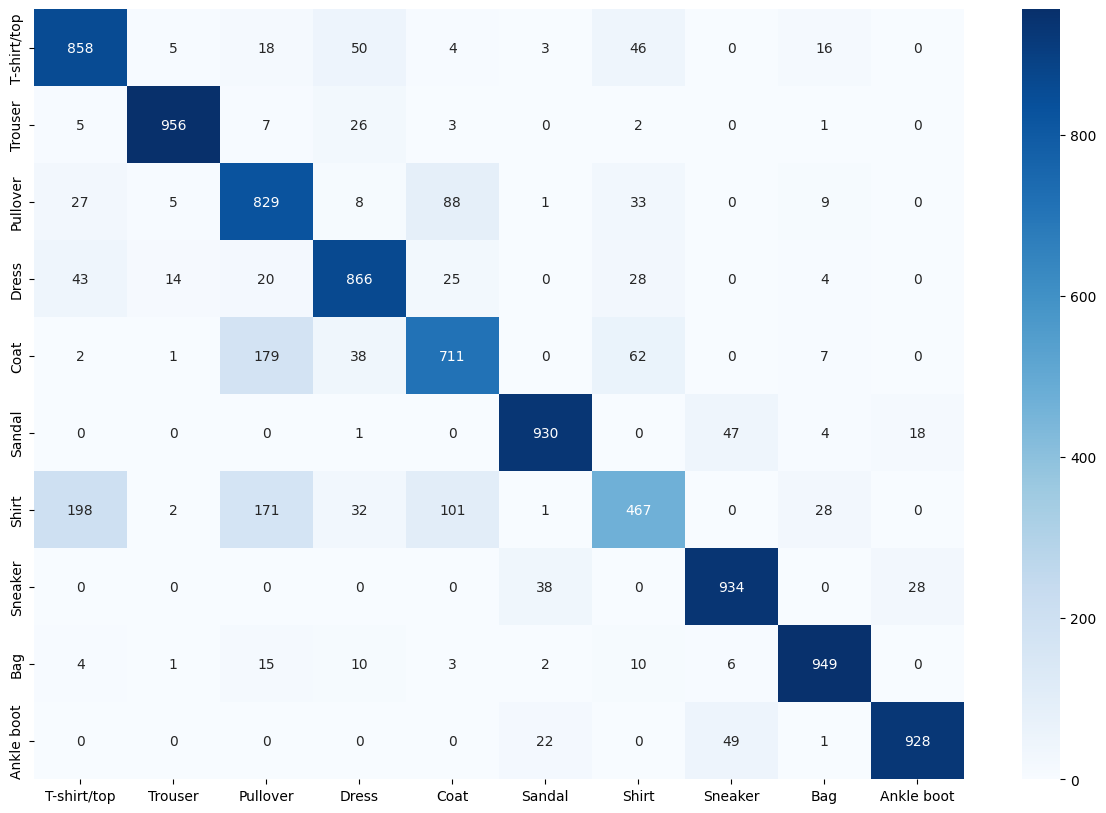

In [14]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(conf_mat, ax=ax, annot=True, fmt="g", cmap="Blues", xticklabels=class_names,yticklabels=class_names)

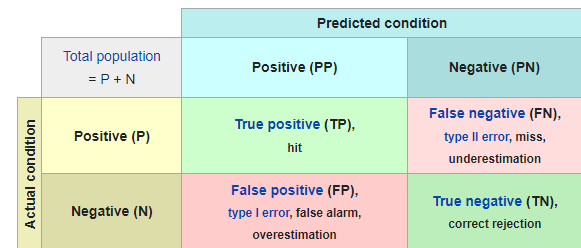

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### **Precision**
$precision = \frac{TP} {TP + FP}$

### **Recall/Sensitivity/True positive rate**
$recall = \frac{TP} {TP + FN}$

### **Fall-out/False positive rate**
$fallout = \frac{FP} {FP + TN}$

### **Specificity/True negative rate**
$specificity = \frac{TN} {TN + FP}$

### **F1-score (harmonic mean of precision and recall)**
$F1 = \frac{2TP} {2TP + FP + FN}$


In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.67      0.83      0.74      1000
           3       0.84      0.87      0.85      1000
           4       0.76      0.71      0.73      1000
           5       0.93      0.93      0.93      1000
           6       0.72      0.47      0.57      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [16]:
# binarize labels to one-hot encoded vectors
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_labels)
test_labels_onehot = label_binarizer.transform(test_labels)
test_labels_onehot.shape

(10000, 10)

In [17]:
label_binarizer.transform([2])

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
# predict y_pred again
y_pred = model.predict(test_images)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([9.96203977e-04, 6.29120390e-04, 9.45133939e-02, 5.00142014e-05,
       7.86875188e-01, 2.30517728e-07, 1.14435725e-01, 7.83909826e-08,
       2.49979738e-03, 2.87893556e-07], dtype=float32)

## **ROC curves**

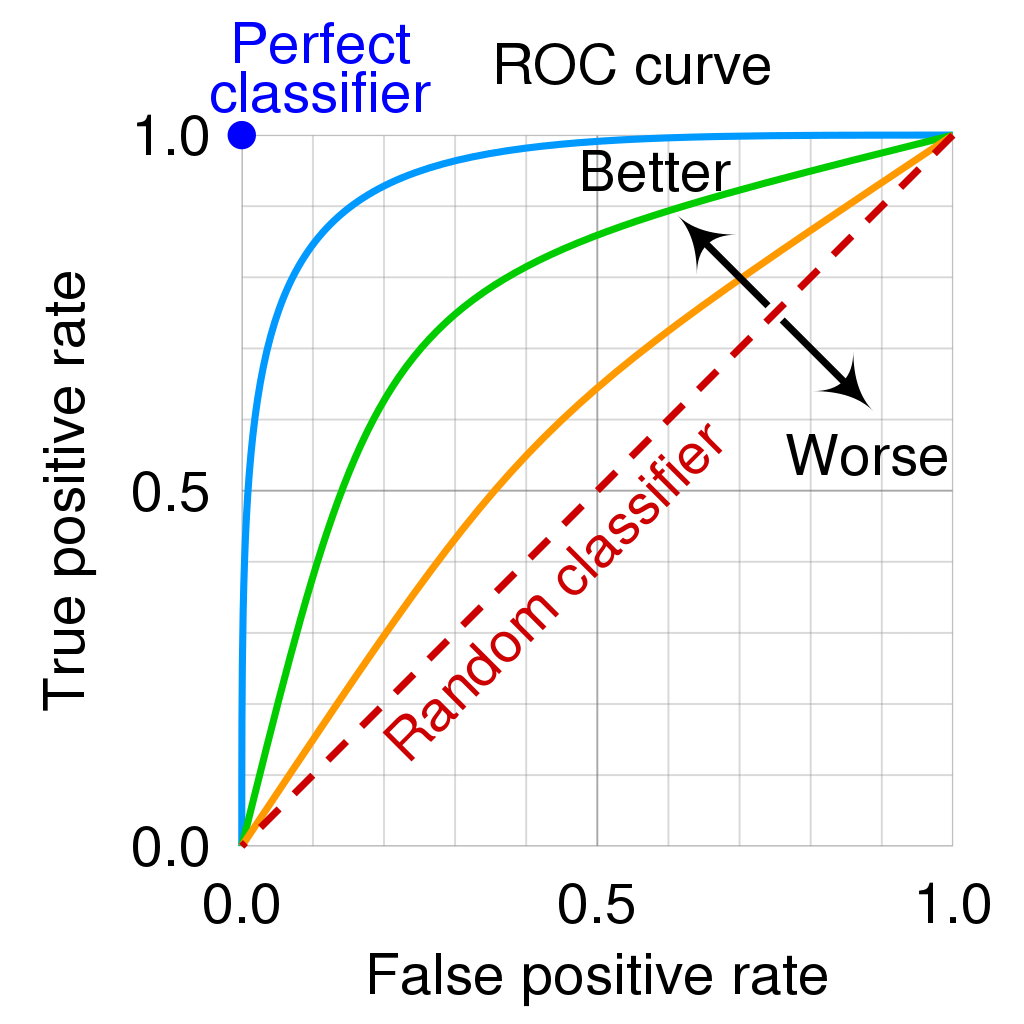

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#/media/File:Roc_curve.svg

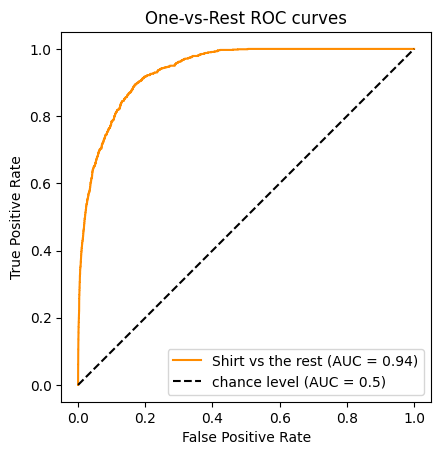

In [19]:
# display ROC curves
from sklearn.metrics import RocCurveDisplay

class_id = 6

RocCurveDisplay.from_predictions(
    test_labels_onehot[:, class_id],
    y_pred[:, class_id],
    name=f"{class_names[class_id]} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

## k-fold Cross Validation

In [20]:
# Merge inputs and targets
inputs = np.concatenate((train_images, val_images, test_images), axis=0)
targets = np.concatenate((train_labels, val_labels, test_labels), axis=0)

inputs.shape

(70000, 28, 28, 1)

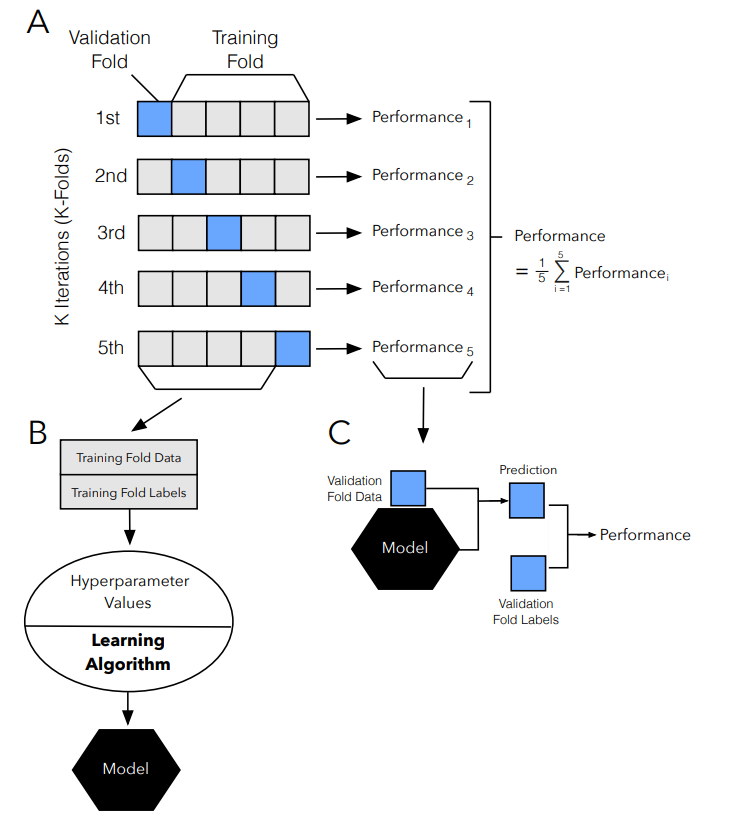

Source: https://arxiv.org/pdf/1811.12808.pdf

In [21]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=7, shuffle=True)

In [22]:
def get_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  #model.add(tf.keras.layers.Dense(256, activation='relu'))
  #model.add(tf.keras.layers.Dropout(0.1))
  #model.add(tf.keras.layers.Dense(128, activation='relu'))
  #model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.SGD(opt1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

In [23]:
acc_per_fold = []
loss_per_fold = []

for idx, (train, test) in enumerate(kfold.split(inputs, targets)):
  model = get_model()

  history = model.fit(inputs[train], targets[train], batch_size=128, epochs=10, verbose=0)
  scores = model.evaluate(inputs[test], targets[test])

  print(f'Score for fold {idx + 1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

ValueError: in user code:

    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/engine/training.py", line 893, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 539, in minimize
        return self.apply_gradients(grads_and_vars, name=name)
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 646, in apply_gradients
        self._create_all_weights(var_list)
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 859, in _create_all_weights
        self._create_hypers()
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 1020, in _create_hypers
        self._hyper[name] = self.add_weight(
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/optimizer_v2.py", line 1233, in add_weight
        variable = self._add_variable_with_custom_getter(
    File "/Users/aichacheridi/Library/Caches/pypoetry/virtualenvs/dss-hmwork-8-r0IGAxQu-py3.10/lib/python3.10/site-packages/keras/engine/base_layer_utils.py", line 126, in make_variable
        return tf.compat.v1.Variable(

    ValueError: Attempt to convert a value (<keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x282ceae30>) with an unsupported type (<class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>) to a Tensor.
